<img src="AIPIC\shaygan.jpg" align="left" height="100" width="200">
<img src="AIPIC\1.jpg" align="right" height="80" width="100">

<div style="text-align: center; font-size:1.2em"> Artificial Intelligence for Smart Network Management </div>
<img src="AIPIC\AI.PNG" height="500" width="500" align="center">

<img src="AIPIC\AI for Telecom Height2.PNG" height="200" width="400" align="center">

<img src="AIPIC\AI7.png" height="1100" width="1000" align="center">

<div style="text-align: center; font-size:1.5em"> Data Volume </div>

<img src="Quantity3.png" height="1100" width="1100" align="right">

<img src="AIPIC\Big-data-3_2.png" height="1100" width="1200" align="center">

<div style="text-align: center; font-size:1.5em"> Input Dataset </div>

<img src="AIPIC\Input_Dataset12.png" height="1500" width="1300" align="center">

<div style="text-align: center; font-size:1.5em"> Data Mining </div>

<img src="AIPIC\Data Mining3.png" height="300" width="1100" align="center">

<div style="text-align: center; font-size:1.5em"> Tools </div>

<img src="AIPIC\Tools_6.png" height="300" width="1100" align="center">

<img src="AIPIC\shaygan.jpg" align="left" height="100" width="200"><img src="AIPIC\1.jpg" align="right" height="80" width="100">

<div style="text-align: center; font-size:2em"> Cell Behavior Model </div>

<div style="text-align: center; font-size:1.5em"> Overview </div>

<img src="AIPIC\Cell_beh11.PNG" align="center" height="400" width="1100">

# Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import math as mt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

<div style="text-align: center; font-size:1.5em"> Data Visualization </div>

In [2]:
df1=pd.read_excel('Cell to Cell Distance.xlsx')
df1.head(10)
df1=df1.drop(columns=['Origin','Destination'])
df2=pd.read_excel('Propagation delay.xlsx')
df2=df2.dropna()
df2.head(10)
df3=df2.groupby(by='Sector',as_index=False)['Average Propagation Delay'].mean()
df3.head()
df5=pd.merge(df2,df3,how='left',on='Sector')
df6=df5.drop_duplicates(subset='Sector')

Text(0,0.5,'Cell to Cell Distance')

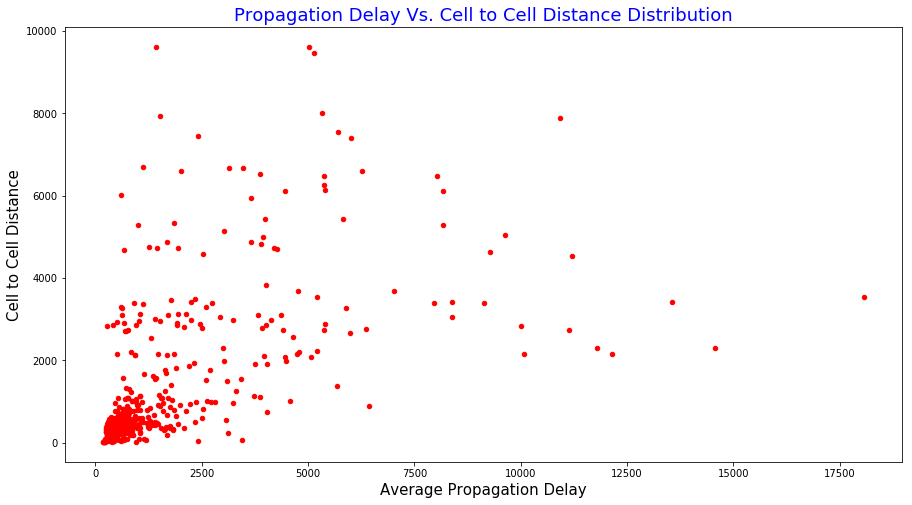

In [3]:
df5=pd.merge(df2,df3,how='left',on='Sector')
df6=df5.drop_duplicates(subset='Sector')
df6['Log_Average Propagation Delay_y']=np.log10(df6['Average Propagation Delay_y'])
df6['Log_Distance_Result']=np.log10(df6['Distance_Result'])
df6['Propagat']=2+(df6['Log_Average Propagation Delay_y']-df6['Log_Average Propagation Delay_y'].mean())/(df6['Log_Average Propagation Delay_y'].std())
df6['Distance']=(df6['Log_Distance_Result']-df6['Log_Distance_Result'].mean())/(df6['Log_Distance_Result'].std())
#np.log10(df6['Average Propagation Delay_y'])
df6.plot.scatter('Average Propagation Delay_y','Distance_Result',logx=False,logy=False,c='red',figsize=(15,8))
plt.title('Propagation Delay Vs. Cell to Cell Distance Distribution',fontsize=18,color='blue')
plt.xlabel('Average Propagation Delay',fontsize=15)
plt.ylabel('Cell to Cell Distance',fontsize=15)

<img src="AIPIC\Data_Visualization2.png" align="center" height="300" width="1100">

# Data Understanding (Statisticaly)

In [33]:
Q1=df6['Average Propagation Delay_y'].quantile(0.25)
Q3=df6['Average Propagation Delay_y'].quantile(0.75)
IQR=Q3-Q1
print(IQR)
print(Q3+1.5*IQR)

### Outlier Detection

z=(df6<(Q1-1.5*IQR))|(df6>(Q3+1.5*IQR))
z[z['Average Propagation Delay_y']==True]

951.8040857536874
2776.7649472653293


In [4]:
df7=pd.DataFrame()
#df7['Cell Name']=df6['Cell Name']
df7['Average Propagation Delay_y']=df6['Average Propagation Delay_y']
df7['Distance_Result']=df6['Distance_Result']
df7.head()

,Average Propagation Delay_y,Distance_Result
0,5024.612240,9616.173871
2,1417.733203,9616.173871
4,5128.860523,9466.151549
6,1117.461458,6703.658788
8,3145.621484,6678.389421


C:\Users\Milad\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Milad\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


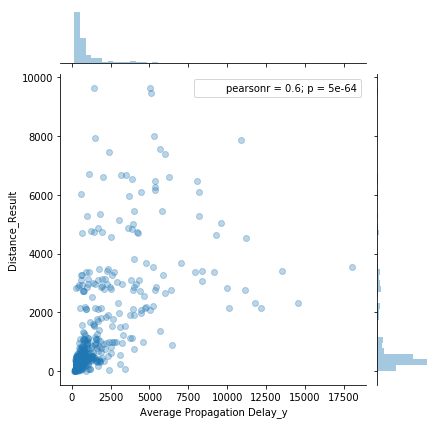

In [17]:
sns.jointplot(x='Average Propagation Delay_y',y='Distance_Result',data=df7,alpha=0.3)

<div style="text-align: center; font-size:1.5em"> Smart Clustering by Machine Learning </div>

<img src="AIPIC\kmeans.GIF" align="center" height="600" width="500">

Text(0,0.5,'Cell to Cell Distance')

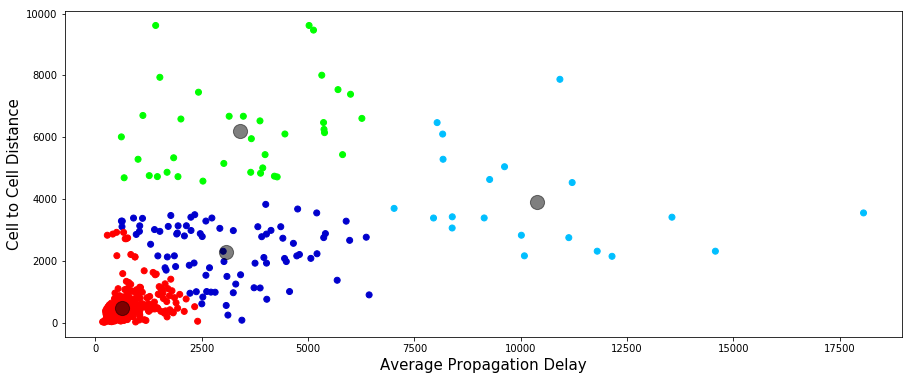

In [40]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=4)
aa=kmeans.fit(df7)
k_labels=pd.DataFrame(data=list(kmeans.labels_),index=df7.index)
df7['Clusters']=k_labels
df7.head()
k_labels=pd.DataFrame(data=kmeans.labels_)
fig, ax1=plt.subplots(1,1,sharey=True,figsize=(15,6))
#ax1.set_title('K Means',fontsize=18,color='green')
colors={0:'red', 1:'mediumblue', 2:'deepskyblue', 3:'lime'}
ax1.scatter(df7['Average Propagation Delay_y'],df7['Distance_Result'],c=df7['Clusters'].apply(lambda x: colors[x]))
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='black', s=200 ,alpha=0.5)
plt.xlabel('Average Propagation Delay',fontsize=15)
plt.ylabel('Cell to Cell Distance',fontsize=15
          )

<div style="text-align: center; font-size:1.5em">C2C Distance & Propagation Delay Clustering </div>

<img src="AIPIC/Clustering_P and D6_org.png" align="center" height="900" width="1100">

<div style="text-align: center; font-size:1.3em">  <span style="color:red">City Cells</span> </div>

<img src="AIPIC\City5.PNG" align="center" height="1000" width="1100">

<div style="text-align: center; font-size:1.3em"><span style="color:Blue">City Border Cells</span> </div>

<img src="AIPIC\CityBorder8.PNG" align="center" height="1000" width="1150">

<div style="text-align: center; font-size:1.3em"><span style="color:green">Rural Cells</span> </div>

<img src="AIPIC\Coverage_Rural5.png" align="center" height="1000" width="1100">

<div style="text-align: center; font-size:1.3em"><span style="color:deepskyblue"> Road Cells</span> </div>

<img src="AIPIC\Coverage_Road7.PNG" align="center" height="1000" width="1100">

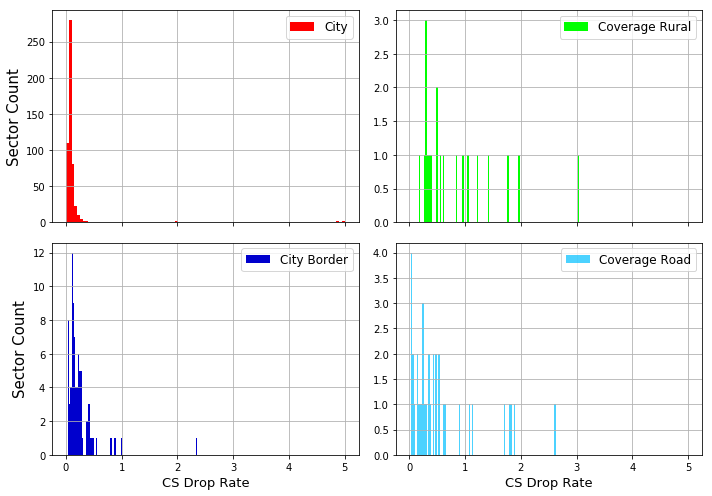

In [14]:
%matplotlib inline
fig2, ax2=plt.subplots(2,2,figsize=(10,7),sharex=True,tight_layout=True)

ax2[0,0].hist(CDR2['CDR'],bins=100,color='red',label='City')
ax2[1,0].hist(CDR3['CDR'],bins=100,color='mediumblue',label='City Border')
ax2[0,1].hist(CDR['CDR'],bins=100,color='lime',label='Coverage Rural')
ax2[1,1].hist(CDR4['CDR'],bins=100,color='deepskyblue',alpha=0.7,label='Coverage Road')

ax2[1,0].set_xlabel('CS Drop Rate',fontsize=13,color='black')
ax2[1,1].set_xlabel('CS Drop Rate',fontsize=13,color='black')

ax2[0,0].set_ylabel('Sector Count',fontsize=15,color='black')
ax2[1,0].set_ylabel('Sector Count',fontsize=15,color='black')

ax2[0,0].legend(fontsize=12)
ax2[1,0].legend(fontsize=12)
ax2[0,1].legend(fontsize=12)
ax2[1,1].legend(fontsize=12)
ax2[0,0].grid(b=True)
ax2[1,0].grid(b=True)
ax2[0,1].grid(b=True)
ax2[1,1].grid(b=True)

<div style="text-align: center; font-size:1.3em; color:black"> Clustering Validation by CS Drop </div>

<img src="AIPIC\CS Drop3.png" align="center" height="500" width="1100">

In [41]:
df7['Clusters']=kmeans.labels_
df7.head(10)

,Average Propagation Delay_y,Distance_Result,Clusters
0,5024.612240,9616.173871,3
2,1417.733203,9616.173871,3
4,5128.860523,9466.151549,3
6,1117.461458,6703.658788,3
8,3145.621484,6678.389421,3
10,3478.789583,6678.389421,3
12,6266.316797,6608.938513,3
14,2011.122005,6588.839211,3
16,3870.165755,6528.405179,3
18,5364.969895,6474.355253,3


In [42]:
df8_new=pd.merge(df6,df7,how='left')
df8_new.head(10)

,Start Time,Period (min),NE Name,Cell Name,Sector,Average Propagation Delay_x,Destination,Distance_Result,Average Propagation Delay_y,Log_Average Propagation Delay_y,Log_Distance_Result,Propagat,Distance,Clusters
0,2018-11-11 00:00:00,30,Qom_R251H,QM2U0054A2,QM0054A,6037.0,QM1G0277B,9616.173871,5024.612240,3.701103,3.983002,3.979546,2.487576,3
1,2018-11-11 00:00:00,30,Qom_R251H,QM2U0054B2,QM0054B,1297.6,QM1G0277B,9616.173871,1417.733203,3.151595,3.983002,2.622682,2.487576,3
2,2018-11-11 00:00:00,30,Qom_R251H,QM2U0054C2,QM0054C,7527.0,QM1G0277B,9466.151549,5128.860523,3.710021,3.976173,4.001568,2.473798,3
3,2018-11-11 00:00:00,30,Qom_R251H,QM2U0084A2,QM0084A,1212.9,QM1G0005A,6703.658788,1117.461458,3.048233,3.826312,2.367457,2.171440,3
4,2018-11-11 00:00:00,30,Qom_R251H,QM2U0030A1,QM0030A,3176.7,QM1G0021B,6678.389421,3145.621484,3.497706,3.824672,3.477313,2.168131,3
5,2018-11-11 00:00:00,30,Qom_R251H,QM2U0030B1,QM0030B,2922.0,QM1G0021B,6678.389421,3478.789583,3.541428,3.824672,3.585273,2.168131,3
6,2018-11-11 00:00:00,30,Qom_R251H,QM2U0084C2,QM0084C,9351.6,QM1G0005A,6608.938513,6266.316797,3.797012,3.820132,4.216370,2.158971,3
7,2018-11-11 00:00:00,30,Qom_R251H,QM2U0084B2,QM0084B,1587.0,QM1G0005A,6588.839211,2011.122005,3.303438,3.818809,2.997620,2.156302,3
8,2018-11-11 00:00:00,30,Qom_R251H,QM2U0030C1,QM0030C,3556.8,QM1G0021B,6528.405179,3870.165755,3.587730,3.814807,3.699602,2.148228,3
9,2018-11-11 00:00:00,30,Qom_R251H,QM2U0262A2,QM0262A,6840.9,QM1G0277A,6474.355253,5364.969895,3.729567,3.811197,4.049832,2.140943,3


In [43]:
df8_new.to_excel('Clustering_new2.xlsx')

Kmeans Evaluation

In [45]:
from sklearn.metrics import silhouette_score
for n in df8['Clusters']:
    Si=silhouette_score(df7,df8['Clusters'])
    print(Si)

In [44]:
df9=pd.DataFrame()

df9['Sector']=df8_new['Sector']
df9['Clusters']=df8_new['Clusters']
df9.head()

,Sector,Clusters
0,QM0054A,3
1,QM0054B,3
2,QM0054C,3
3,QM0084A,3
4,QM0030A,3


<div style="text-align: center; font-size:1.5em; color:black"> Second Level Clustering </div>

<img src="AIPIC\Clustering_P and D4.PNG" align="center" height="900" width="1100">

<font color='mediumblue'>Importing Data from Database</font>

In [48]:
import pyodbc
connection = pyodbc.connect("DRIVER={SQL Server};"
                  "SERVER=10.186.179.11;"
                  "DATABASE=DashboardDB;"
                  "UID=view;"
                  "PWD=Viewer@123;"
                  "TrustServerCertificate=no;"
                  "Connection Timeout=60")

cursor=connection.cursor() 
SQLCommand=("select [DateTime], CellName, [Voice_Traffic(GB)] as Voice_Traffic, [PS_Payload(GB)] as PS_Payload from AvailabilityCounters3G where left(CellName,2)='QM' and CAST([DateTime] AS date)>='2018-10-16'")
cursor.execute(SQLCommand)
results=cursor.fetchall()

In [49]:
d=[]
for row in results:
    d.append({'Date':row.DateTime, 'Cell Name':row.CellName, 'CS Traffic':row.Voice_Traffic, 'PS_Payload':row.PS_Payload})
traffic_Coverage=pd.DataFrame(d)
traffic_Coverage

,CS Traffic,Cell Name,Date,PS_Payload
0,0.259,QM1U0189A2,2018-10-16 00:00:00,0.486
1,0.133,QM1U0189A2,2018-10-16 01:00:00,0.726
2,0.016,QM1U0189A2,2018-10-16 02:00:00,0.205
3,0.000,QM1U0189A2,2018-10-16 03:00:00,0.030
4,0.000,QM1U0189A2,2018-10-16 04:00:00,0.262
5,0.017,QM1U0189A2,2018-10-16 05:00:00,0.065
6,0.100,QM1U0189A2,2018-10-16 06:00:00,0.011
7,0.392,QM1U0189A2,2018-10-16 07:00:00,0.084
8,0.675,QM1U0189A2,2018-10-16 08:00:00,0.093
9,0.950,QM1U0189A2,2018-10-16 09:00:00,0.361


In [50]:
traffic_Coverage['Sector']=traffic_Coverage['Cell Name'].str[:2]+traffic_Coverage['Cell Name'].str[4:9]
traffic_Coverage.head()

,CS Traffic,Cell Name,Date,PS_Payload,Sector
0,0.259,QM1U0189A2,2018-10-16 00:00:00,0.486,QM0189A
1,0.133,QM1U0189A2,2018-10-16 01:00:00,0.726,QM0189A
2,0.016,QM1U0189A2,2018-10-16 02:00:00,0.205,QM0189A
3,0.000,QM1U0189A2,2018-10-16 03:00:00,0.030,QM0189A
4,0.000,QM1U0189A2,2018-10-16 04:00:00,0.262,QM0189A


In [150]:
traffic_Coverage.to_excel('PS2.xlsx')

KeyboardInterrupt: 

In [51]:
cl=pd.read_excel('HolidayCalendar.xlsx')

In [52]:
cl.head()

,MiladiDate,ShamsiDate,ShamsiMonth,ShamsiDayNum,ShamsiDayName,GhamariDayNum,GhamariMonth,GhamariYear,MiladiDay,MiladiMonth,MiladiYear,ShamsiWeekNum,ShamsiWeekName,Status,Event,Network Highlight Events,Network Highlight Events.1,Network Highlight Events.2
0,2018-03-21,1397/1/1,فروردین,1,چهارشنبه,3,رجب,1439,21,Mars,2018,1,هفته اول,تعطیل,نوروز,NaN,NaN,NaN
1,2018-03-22,1397/1/2,فروردین,2,پنجشنبه,4,رجب,1439,22,Mars,2018,1,هفته اول,تعطیل,نوروز,NaN,NaN,NaN
2,2018-03-23,1397/1/3,فروردین,3,جمعه,5,رجب,1439,23,Mars,2018,1,هفته اول,تعطیل,نوروز,NaN,NaN,NaN
3,2018-03-24,1397/1/4,فروردین,4,شنبه,6,رجب,1439,24,Mars,2018,2,هفته دوم,تعطیل,نوروز,NaN,NaN,NaN
4,2018-03-25,1397/1/5,فروردین,5,یکشنبه,7,رجب,1439,25,Mars,2018,2,هفته دوم,عادی,NaN,NaN,NaN,NaN


In [53]:
cl2=pd.DataFrame()

cl2['Date']=cl['MiladiDate']
cl2['Status']=cl['Status']
cl2['New_Date']=[d.date() for d in cl2['Date']]
cl2.head()

,Date,Status,New_Date
0,2018-03-21,تعطیل,2018-03-21
1,2018-03-22,تعطیل,2018-03-22
2,2018-03-23,تعطیل,2018-03-23
3,2018-03-24,تعطیل,2018-03-24
4,2018-03-25,عادی,2018-03-25


In [54]:
traffic=pd.merge(traffic_Coverage,df9,how='left',on='Sector')

In [55]:
traffic2=traffic.sort_values(['Sector','Date'])
traffic2['New_Date']=[d.date() for d in traffic2['Date']]
traffic2['New_time']=[d.time() for d in traffic2['Date']]
traffic3=pd.merge(traffic2,cl2,how='left',on='New_Date')
traffic3.head()

,CS Traffic,Cell Name,Date_x,PS_Payload,Sector,Clusters,New_Date,New_time,Date_y,Status
0,1.709,QM2U0001A1,2018-10-16,0.920,QM0001A,0.0,2018-10-16,00:00:00,2018-10-16,عادی
1,0.250,QM2U0001A2,2018-10-16,0.705,QM0001A,0.0,2018-10-16,00:00:00,2018-10-16,عادی
2,0.775,QM1U0001A1,2018-10-16,1.311,QM0001A,0.0,2018-10-16,00:00:00,2018-10-16,عادی
3,0.125,QM1U0001A2,2018-10-16,1.317,QM0001A,0.0,2018-10-16,00:00:00,2018-10-16,عادی
4,0.817,QM1U0001A3,2018-10-16,0.960,QM0001A,0.0,2018-10-16,00:00:00,2018-10-16,عادی


In [56]:
traffic7=pd.DataFrame()

traffic7['Sector']=traffic3['Sector']
traffic7['Clusters']=traffic3['Clusters']
traffic8=traffic7.dropna()
traffic8.drop_duplicates(inplace=True)
traffic8.head()

,Sector,Clusters
0,QM0001A,0.0
8760,QM0001B,0.0
17520,QM0001C,0.0
26280,QM0002A,0.0
29784,QM0002B,0.0


In [57]:
traffic6=traffic3.groupby(['Sector'],as_index=False)['CS Traffic'].max()
traffic6.head()

,Sector,CS Traffic
0,QM0001A,19.600
1,QM0001B,21.683
2,QM0001C,18.658
3,QM0002A,20.825
4,QM0002B,8.975


<font color='red'>Cs Traffic Normalizing</font>

In [58]:
ty = traffic3
import numpy as np
ty['CS Traffic_n'] = ty['CS Traffic'] / ty.groupby('Sector')['CS Traffic'].transform(np.max)
print(ty)

         CS Traffic   Cell Name              Date_x  PS_Payload   Sector  \
0             1.709  QM2U0001A1 2018-10-16 00:00:00       0.920  QM0001A   
1             0.250  QM2U0001A2 2018-10-16 00:00:00       0.705  QM0001A   
2             0.775  QM1U0001A1 2018-10-16 00:00:00       1.311  QM0001A   
3             0.125  QM1U0001A2 2018-10-16 00:00:00       1.317  QM0001A   
4             0.817  QM1U0001A3 2018-10-16 00:00:00       0.960  QM0001A   
5             0.242  QM2U0001A1 2018-10-16 01:00:00       2.477  QM0001A   
6             0.359  QM2U0001A2 2018-10-16 01:00:00       0.405  QM0001A   
7             0.241  QM1U0001A1 2018-10-16 01:00:00       1.169  QM0001A   
8             0.134  QM1U0001A2 2018-10-16 01:00:00       0.810  QM0001A   
9             0.633  QM1U0001A3 2018-10-16 01:00:00       1.349  QM0001A   
10            0.142  QM2U0001A1 2018-10-16 02:00:00       1.019  QM0001A   
11            0.017  QM2U0001A2 2018-10-16 02:00:00       0.904  QM0001A   
12          

<font color='red'>Averaging Base on Holiday and Business Day for each Sector</font>

In [59]:
traffic4=ty.groupby(['Sector','Status','New_time'],as_index=False)['CS Traffic_n','PS_Payload'].mean()
traffic4.head()

,Sector,Status,New_time,CS Traffic_n,PS_Payload
0,QM0001A,تعطیل,00:00:00,0.044784,1.071950
1,QM0001A,تعطیل,01:00:00,0.019663,1.084875
2,QM0001A,تعطیل,02:00:00,0.010902,1.133500
3,QM0001A,تعطیل,03:00:00,0.005973,0.839987
4,QM0001A,تعطیل,04:00:00,0.003906,0.596438


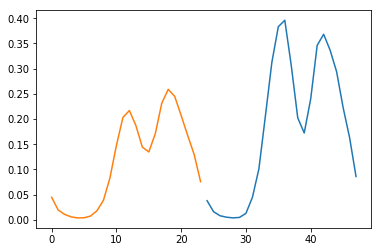

In [60]:

plt.plot(traffic4[(traffic4['Sector']=='QM0001A') & (traffic4['Status']=='عادی' )]['CS Traffic_n'])

plt.plot(traffic4[(traffic4['Sector']=='QM0001A') & (traffic4['Status']=='تعطیل' )]['CS Traffic_n'])

In [61]:
traffic9=traffic8.drop_duplicates()
traffic9.head()

,Sector,Clusters
0,QM0001A,0.0
8760,QM0001B,0.0
17520,QM0001C,0.0
26280,QM0002A,0.0
29784,QM0002B,0.0


In [62]:

traffic10=pd.merge(traffic4,traffic9,how='left',on='Sector')
traffic11=traffic10.dropna()
traffic11.head()
traffic11.to_excel('PS.xlsx')

# Reshaping

In [63]:
x=traffic11[traffic11['Clusters']==0]
y=traffic11[traffic11['Clusters']==1]
w=traffic11[traffic11['Clusters']==2]
z=traffic11[traffic11['Clusters']==3]

xx=x.iloc[:,3].values.reshape(int(len(x)/48),48)
yy=y.iloc[:,3].values.reshape(int(len(y)/48),48)
ww=w.iloc[:,3].values.reshape(int(len(w)/48),48)
zz=z.iloc[:,3].values.reshape(int(len(z)/48),48)

In [64]:
print(len(xx))
print(len(yy))
print(len(ww))
print(len(zz))

511
83
20
36


In [146]:
xx_p=x.iloc[:,4].values.reshape(int(len(x)/48),48)
yy_p=y.iloc[:,4].values.reshape(int(len(y)/48),48)
ww_p=w.iloc[:,4].values.reshape(int(len(w)/48),48)
zz_p=z.iloc[:,4].values.reshape(int(len(z)/48),48)

In [147]:
xx_p

array([[1.07385333e+00, 1.09560000e+00, 1.15057333e+00, ...,
        9.49169811e-01, 1.02402264e+00, 1.05377358e+00],
       [1.42572000e+00, 1.43225333e+00, 1.41422667e+00, ...,
        1.04566038e+00, 1.16268679e+00, 1.26356226e+00],
       [7.75920000e-01, 7.19066667e-01, 7.84133333e-01, ...,
        7.30098113e-01, 7.78649057e-01, 7.98652830e-01],
       ...,
       [2.96888889e-02, 2.18444444e-02, 1.40000000e-02, ...,
        4.21761006e-02, 2.87484277e-02, 1.15220126e-02],
       [5.40000000e-03, 8.15555556e-03, 3.13333333e-03, ...,
        1.61257862e-02, 1.01761006e-02, 6.75471698e-03],
       [3.00000000e-03, 5.66666667e-04, 1.16666667e-03, ...,
        1.46886792e-02, 1.36886792e-02, 4.39622642e-03]])

### Clustering Based on CS Traffic

In [65]:
from sklearn.cluster import KMeans
kmeans2=KMeans(n_clusters=4)
aa2=kmeans2.fit(xx)
qq=kmeans2.cluster_centers_

In [71]:
qq[:,24:48]

array([[0.05169105, 0.02393888, 0.01083348, 0.0058119 , 0.004212  ,
        0.00587832, 0.01641524, 0.054857  , 0.11840523, 0.22815581,
        0.33904784, 0.40748373, 0.41754047, 0.3530985 , 0.24766927,
        0.19735629, 0.25637973, 0.35540742, 0.37777815, 0.34669591,
        0.30277194, 0.24762907, 0.18821632, 0.10970909],
       [0.03019409, 0.01327012, 0.00598987, 0.00346448, 0.00259904,
        0.0038622 , 0.01087851, 0.04002449, 0.09568425, 0.18691564,
        0.27771891, 0.33198973, 0.33641888, 0.2780505 , 0.18444012,
        0.14011507, 0.18096724, 0.25257311, 0.2725103 , 0.25181661,
        0.21517775, 0.1687116 , 0.12054805, 0.06701889],
       [0.01170335, 0.00498129, 0.00246276, 0.00154641, 0.00139203,
        0.00297325, 0.00595007, 0.01419627, 0.0281896 , 0.05078073,
        0.07550999, 0.09116925, 0.09501357, 0.08277767, 0.06217863,
        0.05466792, 0.06682871, 0.08615395, 0.10955736, 0.10162367,
        0.09473716, 0.08350268, 0.06948854, 0.03392581],
       [0.064

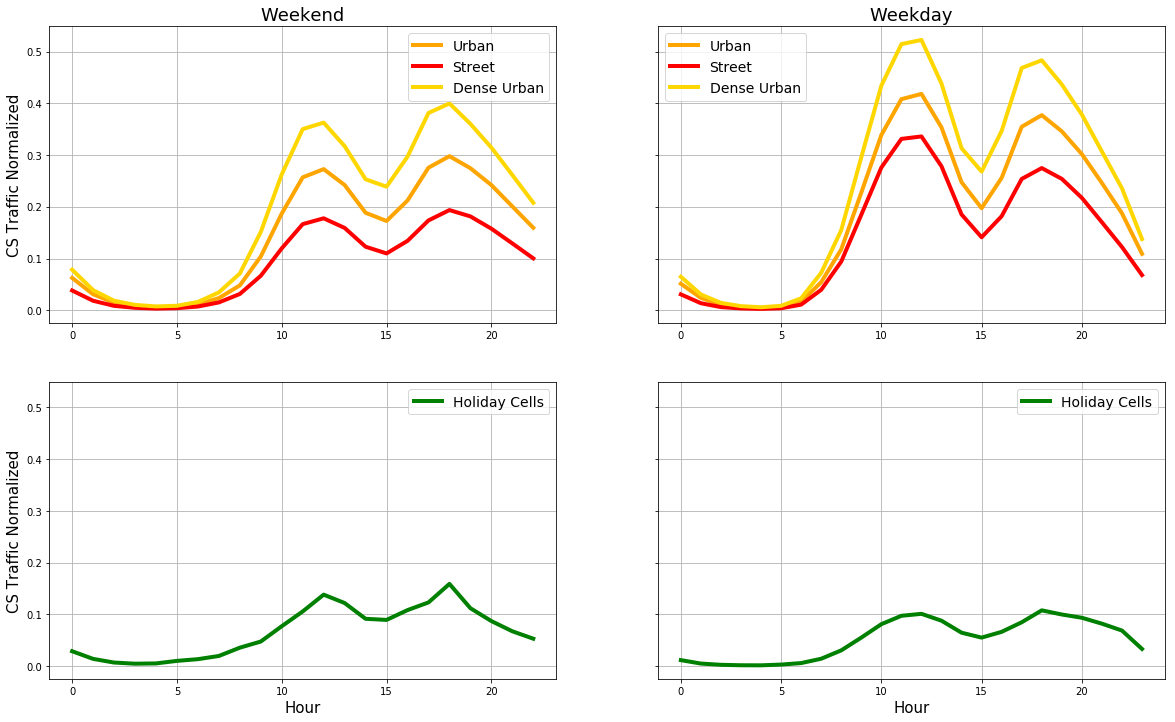

In [80]:
%matplotlib inline
fig10, ax10=plt.subplots(2,2,figsize=(20,12),sharey=True)
ax10[0,0].plot(qq[0,0:23],color='orange',linewidth=4,label='Urban')
ax10[0,1].plot(qq[0,24:48],color='orange',linewidth=4,label='Urban')
ax10[1,0].plot(qq[1,0:23],color='green',linewidth=4,label='Holiday Cells')
ax10[1,1].plot(qq[1,24:48],color='green',linewidth=4,label='Holiday Cells')
ax10[0,0].plot(qq[3,0:23],color='red',linewidth=4,label='Street')
ax10[0,1].plot(qq[3,24:48],color='red',linewidth=4,label='Street')
ax10[0,0].plot(qq[2,0:23],color='gold',linewidth=4,label='Dense Urban')
ax10[0,1].plot(qq[2,24:48],color='gold',linewidth=4,label='Dense Urban')
ax10[0,0].grid(b=True)
ax10[0,1].grid(b=True)
ax10[1,0].grid(b=True)
ax10[1,1].grid(b=True)
ax10[0,0].set_title('Weekend',color='black',fontsize=18)
ax10[0,1].set_title('Weekday',color='black',fontsize=18)
ax10[1,0].set_xlabel('Hour',color='black',fontsize=15)
ax10[1,1].set_xlabel('Hour',color='black',fontsize=15)
ax10[0,0].set_ylabel('CS Traffic Normalized',color='black',fontsize=15)
ax10[1,0].set_ylabel('CS Traffic Normalized',color='black',fontsize=15)
ax10[0,0].legend(fontsize=14)
ax10[0,1].legend(fontsize=14)
ax10[1,0].legend(fontsize=14)
ax10[1,1].legend(fontsize=14)

<div style="text-align: center; font-size:1.5em; color:black"> CS Traffic Behavior Clustering </div>

<img src="AIPIC\CS Traffic Clustering6.png" align="center" height="700" width="1100">

In [117]:
rr=pd.DataFrame(kmeans2.labels_)
rr.to_excel('Clusters_12-Dec.xlsx')
x.to_excel('City_12-Dec.xlsx')

<div style="text-align: center; font-size:1.5em; color:black"> Second Level Clustering Result (1/2) </div>

<img src="AIPIC\City_CL16.png" align="center" height="850" width="1100">

<div style="text-align: center; font-size:1.5em; color:black"> Second Level Clustering Result (2/2) </div>

<img src="AIPIC\City_CL17.png" align="center" height="850" width="1100">

In [25]:
df0=CS_CSSR[CS_CSSR['Clusters']==0]
df1=CS_CSSR[CS_CSSR['Clusters']==1]
df2=CS_CSSR[CS_CSSR['Clusters']==2]
df3=CS_CSSR[CS_CSSR['Clusters']==3]

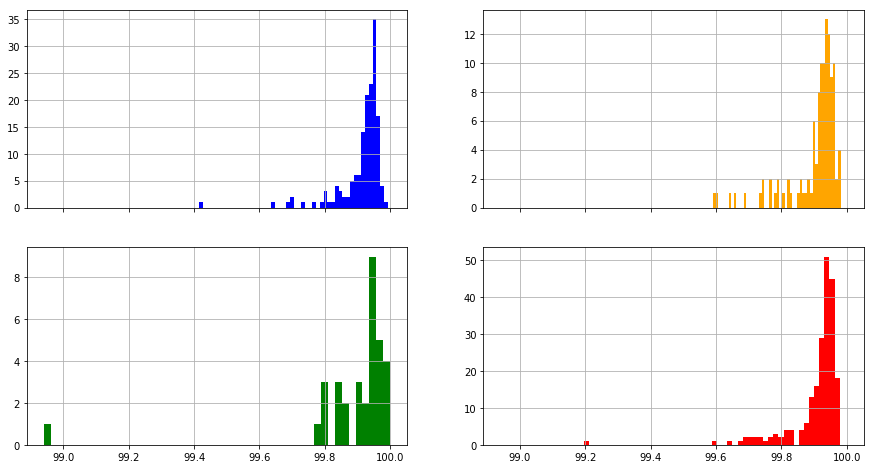

In [26]:
fig, ax=plt.subplots(2,2,figsize=(15,8),sharex=True)#squeeze=False)
ax[0,0].hist(df0['CS_CSSR'],bins=50,color='blue')
ax[0,1].hist(df1['CS_CSSR'],bins=50,color='orange')
ax[1,0].hist(df2['CS_CSSR'],bins=50,color='green')
ax[1,1].hist(df3['CS_CSSR'],bins=50,color='red')
ax[0,0].grid(b=True)
ax[0,1].grid(b=True)
ax[1,0].grid(b=True)
ax[1,1].grid(b=True)

# Comparing Some KPIs based on CS Traffic Clustering
<img src="shaygan.jpg" align="right" vertical-align="bottom" height="100" width="150">

In [5]:
CDR=pd.read_excel('D:\R&D Projects\Optim and Planning Report\Cell Behaviour\CDR_new.xlsx',sheet_name='Sheet1')
CDR.head()

,Column2,CDR
0,QM0173A,0.509167
1,QM0062A,0.557083
2,QM0065A,0.376250
3,QM0073A,0.270833
4,QM0089C,1.420417


In [6]:
CDR2=pd.read_excel('D:\R&D Projects\Optim and Planning Report\Cell Behaviour\CDR2.xlsx',sheet_name='Sheet1')
CDR2.head()

,Column2,CDR
0,QM0002B,0.080417
1,QM0003A,0.074833
2,QM0003B,0.063667
3,QM0003C,0.205333
4,QM0006A,0.109167


In [7]:
CDR3=pd.read_excel('D:\R&D Projects\Optim and Planning Report\Cell Behaviour\CDR3_new.xlsx')
CDR3.head()

,Column2,CDR
0,QM0028B,0.129833
1,QM0228C,0.162167
2,QM0266C,0.146167
3,QM0173B,0.203750
4,QM0017A,0.372500


In [8]:
CDR4=pd.read_excel('D:\R&D Projects\Optim and Planning Report\Cell Behaviour\CDR4_new.xlsx')
CDR4.head()

,Cell,CDR
0,QM0049B,0.240417
1,QM0049C,0.141250
2,QM0067A,0.169583
3,QM0067B,0.067500
4,QM0067C,0.032500


In [74]:
CS_Att_City=pd.read_excel('CS_Att_City.xlsx')

CS_Att_City.head()

,Sector,CS_Att,Clusters
0,QM0001A,404074,1
1,QM0001B,504109,1
2,QM0001C,331906,1
3,QM0004A,288726,1
4,QM0004B,143400,1


In [75]:
df0_CS_Att_City=CS_Att_City[CS_Att_City['Clusters']==0]
df1_CS_Att_City=CS_Att_City[CS_Att_City['Clusters']==1]
df2_CS_Att_City=CS_Att_City[CS_Att_City['Clusters']==2]
df3_CS_Att_City=CS_Att_City[CS_Att_City['Clusters']==3]

<div style="text-align: left; font-size:1.5em; color:black"> CS Attempts </div>

<img src="CS_Att_CL2.png" align="center" height="700" width="700">
<img src="shaygan.jpg" align="right" vertical-align="bottom" height="100" width="150">

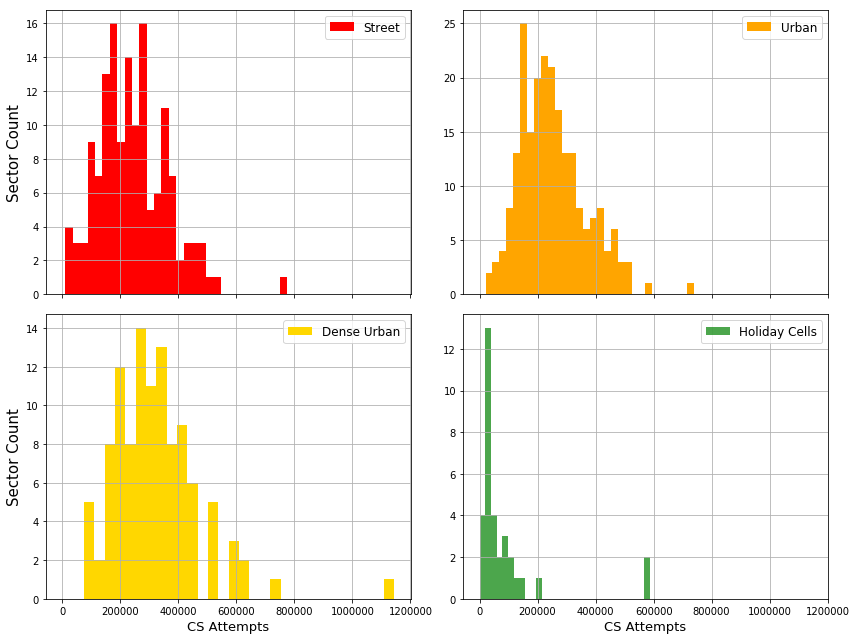

In [78]:
%matplotlib inline
fig2, ax2=plt.subplots(2,2,figsize=(12,9),sharex=True,tight_layout=True)
ax2[0,0].hist(df0_CS_Att_City['CS_Att'],bins=30,color='red',label='Street')
ax2[0,1].hist(df1_CS_Att_City['CS_Att'],bins=30,color='orange',label='Urban')
ax2[1,0].hist(df2_CS_Att_City['CS_Att'],bins=30,color='gold',label='Dense Urban')
ax2[1,1].hist(df3_CS_Att_City['CS_Att'],bins=30,color='green',alpha=0.7,label='Holiday Cells')


ax2[1,0].set_xlabel('CS Attempts',fontsize=13,color='black')
ax2[1,1].set_xlabel('CS Attempts',fontsize=13,color='black')
ax2[0,0].set_ylabel('Sector Count',fontsize=15,color='black')
ax2[1,0].set_ylabel('Sector Count',fontsize=15,color='black')
ax2[0,0].legend(fontsize=12)
ax2[0,1].legend(fontsize=12)
ax2[1,0].legend(fontsize=12)
ax2[1,1].legend(fontsize=12)
ax2[0,0].grid(b=True)
ax2[0,1].grid(b=True)
ax2[1,0].grid(b=True)
ax2[1,1].grid(b=True)

In [136]:
HO_Att_3G_City=pd.read_excel('HO_Att_3G_City.xlsx')
HO_Att_3G_City.head()

,Column2,Clusters,HO_Att,Normalized
0,QM0205C,2,25183,0.007405
1,QM0151A,2,22612,0.006737
2,QM0091A,3,22208,0.006269
3,QM0235A,2,21973,0.002934
4,QM0038B,2,21808,0.003618


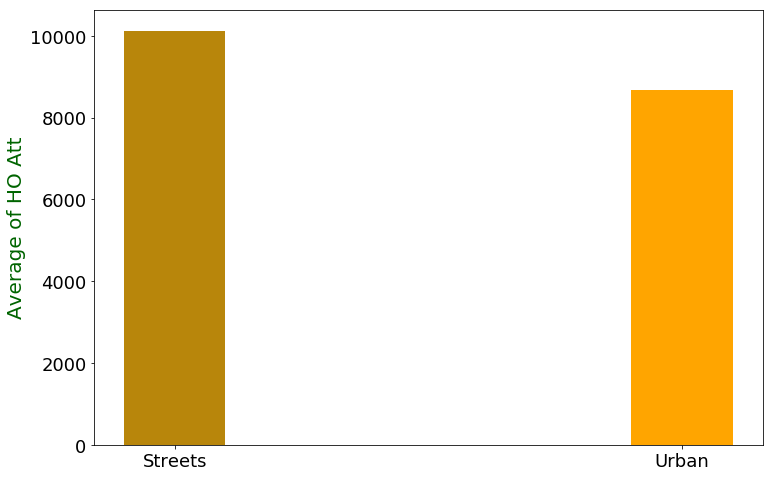

In [140]:
df0_HO_Att_3G_City=HO_Att_3G_City[HO_Att_3G_City['Clusters']==0]
df1_HO_Att_3G_City=HO_Att_3G_City[HO_Att_3G_City['Clusters']==1]
df2_HO_Att_3G_City=HO_Att_3G_City[HO_Att_3G_City['Clusters']==2]
df3_HO_Att_3G_City=HO_Att_3G_City[HO_Att_3G_City['Clusters']==3]
Avg0=np.average(df0_HO_Att_3G_City['HO_Att'])
Avg1=np.average(df1_HO_Att_3G_City['HO_Att'])
Avg2=np.average(df2_HO_Att_3G_City['HO_Att'])
Avg3=np.average(df3_HO_Att_3G_City['HO_Att'])
plt.figure(figsize=(12,8))
ax=plt.bar(x=['Streets','Urban'],height=[Avg0,Avg1],color=['darkgoldenrod','orange'],width=0.2)
plt.ylabel('Average of HO Att',fontsize=20,color='darkgreen')
plt.xticks()
plt.rc('font',size=18)

<IPython.core.display.Javascript object>


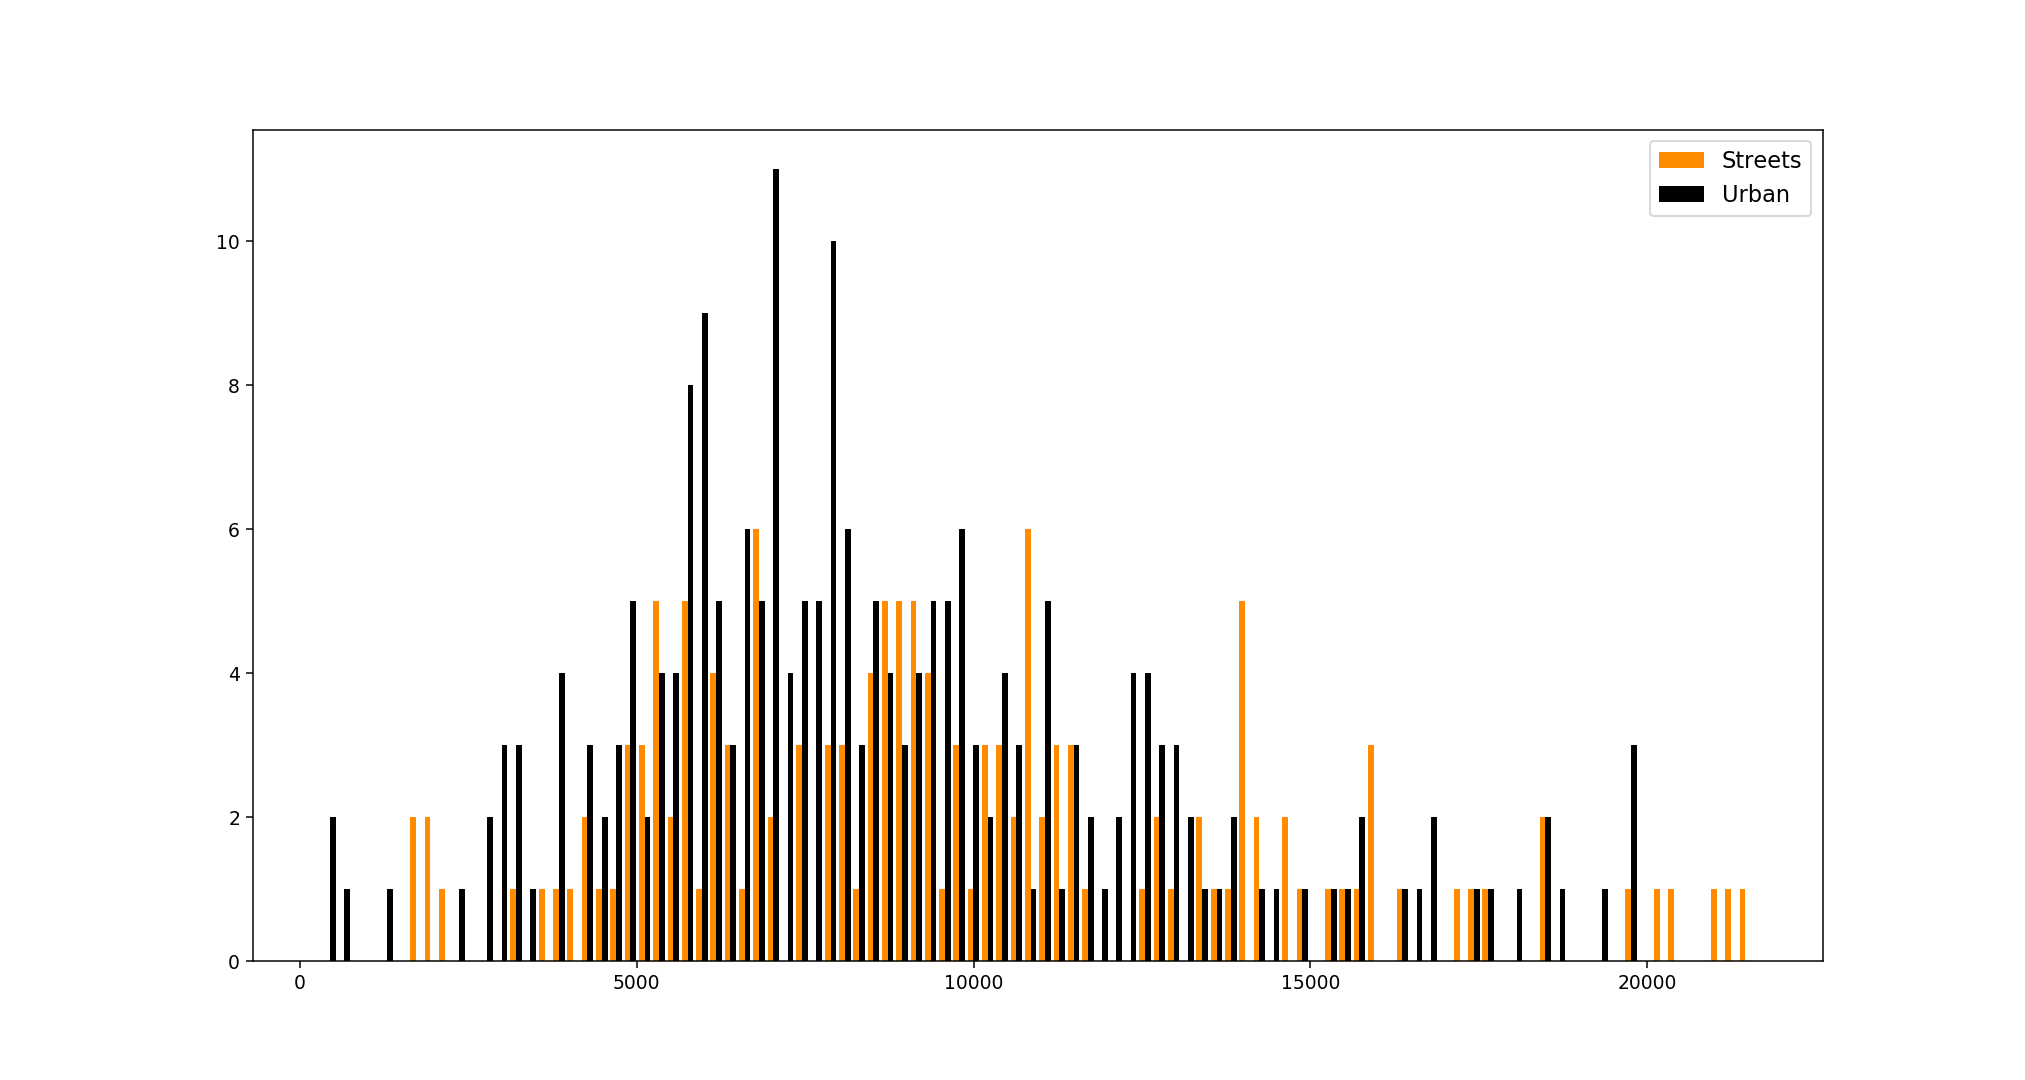

In [47]:
plt.figure(figsize=(15,8))
plt.hist([df0_HO_Att_3G_City['HO_Att'],df1_HO_Att_3G_City['HO_Att']],bins=100,color=['darkorange','black'],label=['Streets','Urban'])
#plt.hist(df1_HO_Att_3G_City['Normalized'],bins=50,color='black',alpha=0.5)#,label='Urban')
plt.legend(fontsize=12)
#ax5[0].grid(b=True)
#ax5[1].grid(b=True)

#ax5[0].legend(fontsize=12)
#ax5[1].legend(fontsize=12)


#fig5.suptitle('HO_Attempts',fontsize=20,color='red')

In [11]:
from scipy.optimize import curve_fit
def gaussian(x1, mean, amplitude, standard_deviation):
    return amplitude * np.exp( - ((x1 - mean) / standard_deviation) ** 2)
bin_heights, bin_borders, _ = plt.hist(x1, bins=20, label='histogram')
bin_heights2, bin_borders2, _ = plt.hist(x2, bins=20, label='histogram')

In [13]:
x1=np.array(df0_HO_Att_3G_City['HO_Att'])
x2=np.array(df1_HO_Att_3G_City['HO_Att'])

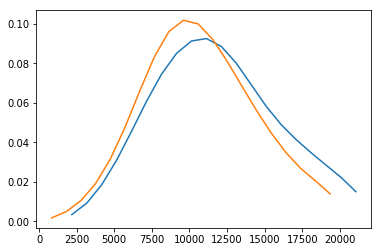

In [45]:
plt.plot(bin_centers,bin_heights)
plt.plot(bin_centers2,bin_heights2)

## comparing HO attempts in street sectors and urabn sectors. 
##### this is clear that in street sectors, HO attempts are greater than urban sectors.

<IPython.core.display.Javascript object>


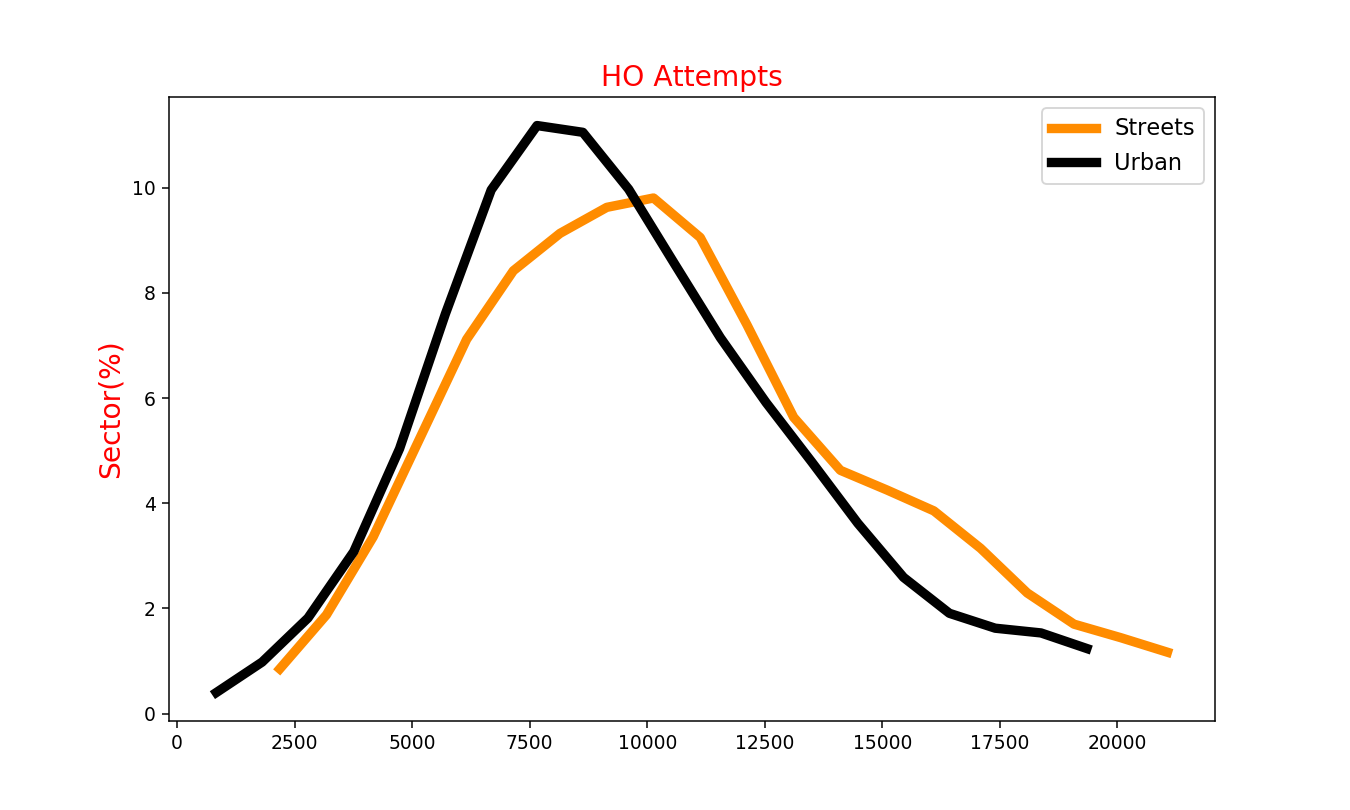

Text(0,0.5,'Sector(%)')

In [158]:
HO=pd.read_excel('HO Att_hourly.xlsx')
HO

,Date,Sector,HO_Att
0,2018-12-23 00:00:00,QM0002B,104
1,2018-12-23 01:00:00,QM0002B,26
2,2018-12-23 02:00:00,QM0002B,8
3,2018-12-23 03:00:00,QM0002B,28
4,2018-12-23 04:00:00,QM0002B,8
5,2018-12-23 05:00:00,QM0002B,4
6,2018-12-23 06:00:00,QM0002B,23
7,2018-12-23 07:00:00,QM0002B,251
8,2018-12-23 08:00:00,QM0002B,1056
9,2018-12-23 09:00:00,QM0002B,1606


In [159]:
xx_H=HO.iloc[:,2].values.reshape(int(len(HO)/24),24)
xx_H

array([[ 104,   26,    8, ...,  618,  342,  196],
       [ 241,   83,   25, ..., 2042,  978,  451],
       [ 381,  310,   50, ..., 3081, 1696,  773],
       ...,
       [  83,   23,    6, ...,  762,  532,  258],
       [ 109,   75,  103, ..., 1335,  733,  357],
       [ 106,   32,    5, ...,  695,  646,  365]], dtype=int64)

In [174]:
from sklearn.cluster import KMeans
kmeans_H=KMeans(n_clusters=2)
aa_H=kmeans_H.fit(xx_H)
qq_H=kmeans_H.cluster_centers_

In [187]:
qq_H

array([[ 217.02145923,   97.53218884,   50.34334764,   29.69098712,
          21.68669528,   31.37339056,  116.15450644,  441.22746781,
         878.69957082, 1663.92274678, 2410.59656652, 2852.47639485,
        3103.41630901, 2372.28755365, 1612.9055794 , 1200.64806867,
        1653.3776824 , 2337.56652361, 2352.49356223, 2082.87124464,
        1775.21459227, 1374.29184549,  934.63948498,  477.87553648],
       [ 390.09016393,  168.04918033,   79.59836066,   50.49180328,
          45.36885246,   60.72131148,  213.54098361,  837.41803279,
        1830.06557377, 3494.37704918, 5327.25409836, 6435.3852459 ,
        6887.68032787, 5266.13934426, 3351.36065574, 2364.75409836,
        3253.30327869, 4837.83606557, 5050.03278689, 4587.3442623 ,
        3929.42622951, 2872.76229508, 1874.09016393,  890.2704918 ]])

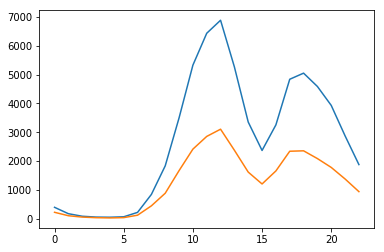

In [190]:
plt.plot(qq_H[1,0:23])
plt.plot(qq_H[0,0:23])

In [186]:
df_H=pd.DataFrame(data=kmeans_H.labels_)
df_H.to_excel('Cluster_H.xlsx')

<div style="text-align: center; font-size:1.3em; color:black"> Clustering Validation by HO/Erl </div>

<img src="AIPIC\HO_Att_CL6.png" align="center" height="1000" width="1000">

<div style="text-align: center; font-size:1.5em; color:black"> Hourly Traffic Classification </div>

<img src="AIPIC\peaks6.png" align="center" height="400" width="1200">

<div style="text-align: center; font-size:1.5em; color:black"> Sector List </div>

<img src="AIPIC\peaks7.png" align="center" height="400" width="1200">

<div style="text-align: center; font-size:1.5em; color:black"> Hourly Traffic Classification Samples </div>

<img src="AIPIC\peaks_sample2.PNG" align="center"  height="600" width="1100">

<div style="text-align: center; font-size:1.5em; color:black"> Evaluating Optimization Sub-Contractors </div>

<img src="AIPIC\Threshold_Defining7.PNG" align="center" height="400" width="1200">

<div style="text-align: center; font-size:1.5em; color:black"> Next Step </div>

<img src="AIPIC\Clutter view and sites2.png" align="center" height="400" width="1200">

<div style="text-align: center; font-size:1.5em; color:black"> Mapping Clutter to Cells (1/2) </div>

<img src="AIPIC\Mapping Clutter to cells3.png" align="center" height="400" width="1200">

<div style="text-align: center; font-size:1.5em; color:black"> Mapping Clutter to Cells (2/2) </div>

<img src="AIPIC\Mapping Clutter to cells5.png" align="center" height="400" width="1200">

<div style="text-align: center; font-size:1.8em; color:black"> Thanks </div>

<img src="AIPIC\Thanks.JPG" align="center" height="400" width="700">

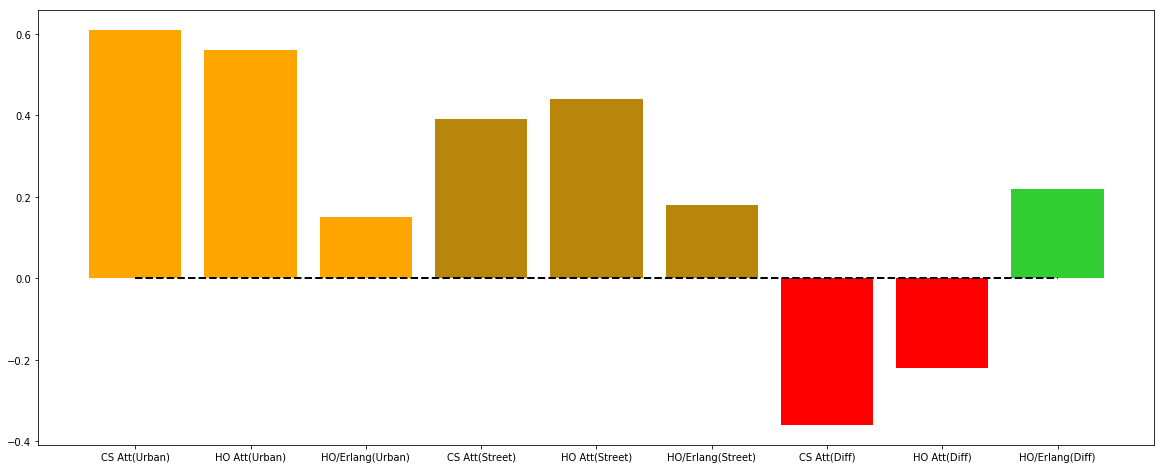

In [3]:
plt.figure(figsize=(20,8))
a=[0.61, 0.56, 0.15,0.39, 0.44, 0.18,-0.36, -0.22, 0.22]
plt.bar(['CS Att(Urban)','HO Att(Urban)','HO/Erlang(Urban)','CS Att(Street)','HO Att(Street)','HO/Erlang(Street)','CS Att(Diff)','HO Att(Diff)','HO/Erlang(Diff)'],a,color=['orange','orange','orange','darkgoldenrod','darkgoldenrod','darkgoldenrod','red','red','limegreen'])
plt.plot([0,0,0,0,0,0,0,0,0,],color='black',linestyle='dashed',linewidth=2)
plt.rc('font',size=12)

<BarContainer object of 2 artists>

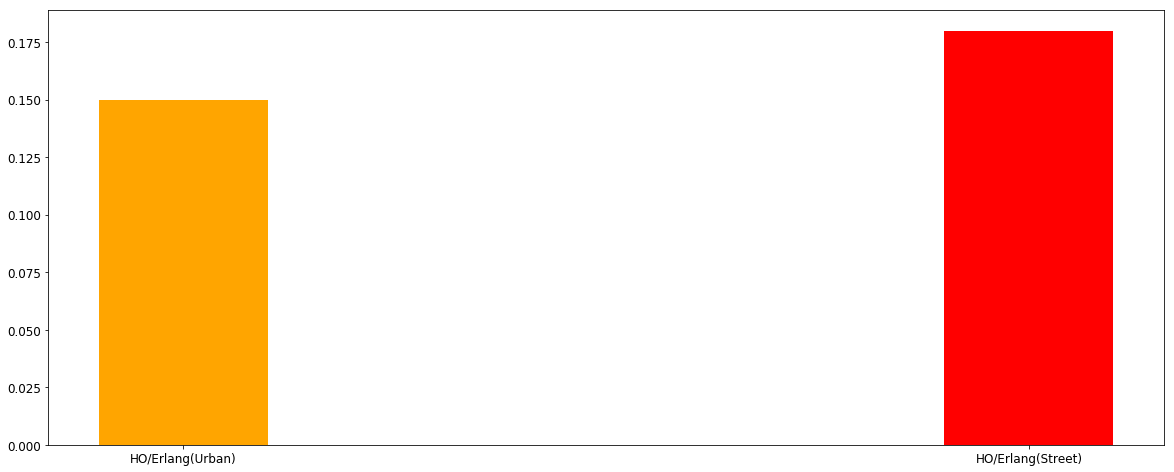

In [11]:
plt.figure(figsize=(20,8))
b=[0.15,0.18]
plt.bar(['HO/Erlang(Urban)','HO/Erlang(Street)'],b,color=['orange','red'],width=0.2)